# PCA (Principal Component Analysis)

PCA looks at the features that are the most representative of the data and ranks them.
Then, you can use the ranking to get rid of the lowest ranking features as a feature reduction method.

This Notebook takes 3 D data and reduces it into 2 D using PCA.
A useful explanation with the same steps as this notebook can be found here:
https://builtin.com/data-science/step-step-explanation-principal-component-analysis

## The Data

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9]

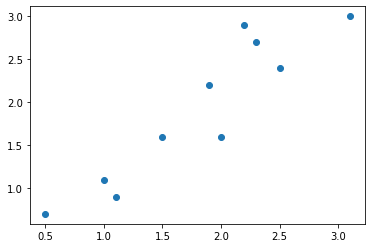

In [3]:
def plot_data(x_values, y_values):
    plt.scatter(x_values, y_values, label='data')
    plt.show()
    
plot_data(x,y)

def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return [min_val, max_val]

xlim = minmax(x)
ylim = minmax(y)


## Step 1: Standardization

In [4]:
# Calculate the mean and standard deviation of each
x_mean= np.mean(x)
y_mean= np.mean(y)



x_std= np.std(x)
y_std= np.std(y)


# Find the z value of each axis where z = x-x_mean. This is just the mean adjusted data.
def z_fun(data, mean, std):
    z_val = []
    for i in data:
        z_val.append((i-mean))
    return z_val

z_x = z_fun(x,x_mean,x_std)
z_y = z_fun(y,y_mean,y_std)

## Step 2: Covariance Calculation

In [5]:
# Lets combine our mean adjusted data into one matrix first
z_final = np.vstack([z_x,z_y])

# Find the covariance matrix of z_final
covariance = np.cov(z_final)
print(covariance)

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


## Step 3: Eigenvectors and Eigenvalues

[0.0490834  1.28402771]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


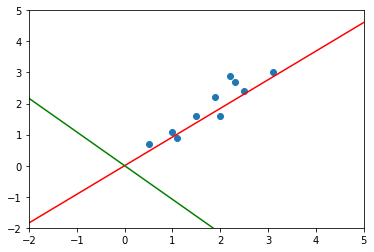

In [6]:
# Get the eigenvalues and eigenvectors of the covariance matrix

eig_val, eig_vec = np.linalg.eig(covariance)
print(eig_val)
print(eig_vec)

# The vector with the highest eigenvalues are the highest ranked components. For this example, 
# the first vector is the highest.

def span(x,y,rev=False):
    sign = 1
    if rev == True:
        sign = -1
    x_vals = []
    y_vals = []
    samples = np.arange(-50,50,1)
    for i in samples:
        x_vals.append(x*i*sign)
        y_vals.append(y*i*sign)

    return x_vals, y_vals

x_vals1, y_vals1 = span(eig_vec[0][0],eig_vec[0][1])
x_vals2, y_vals2 = span(eig_vec[1][0],eig_vec[1][1])

# plot the principal component eigenvectors
plt.scatter(x,y, label='data')
plt.plot(x_vals1, y_vals1, 'r')
plt.plot(x_vals2, y_vals2, 'g')

plt.xlim([-2,5])
plt.ylim([-2,5])
plt.show()

## Step 4: Feature Vector
The highest eigenvalue is the 2nd one so I select only the second vector in this example

In [10]:
# Get the 2nd eigenvector
feat=eig_vec[1]

# Matrix multiplication of the feature vector and the standardized data

fin=np.matmul(feat, z_final)
print(fin)

[ 0.1074951   0.00155202 -0.46345624 -0.1521932   0.07311195 -0.24863317
  0.35670133  0.04641726  0.01776463  0.26124033]


This is our reduced data set along the first principal component. 